In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("Breast_cancer_data.csv")
df

,mean_radius,mean_texture,mean_perimeter,diagnosis
0,17.99,10.38,122.80,0
1,20.57,17.77,132.90,0
2,19.69,21.25,130.00,0
3,11.42,20.38,77.58,0
4,20.29,14.34,135.10,0
...,...,...,...,...
564,21.56,22.39,142.00,0
565,20.13,28.25,131.20,0
566,16.60,28.08,108.30,0
567,20.60,29.33,140.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mean_radius     569 non-null    float64
 1   mean_texture    569 non-null    float64
 2   mean_perimeter  569 non-null    float64
 3   diagnosis       569 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.9 KB


In [4]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
corr_mat = df.corr(numeric_only=True)

In [10]:
corr_mat = corr_mat.sort_values(by="diagnosis", ascending=False)
ordered_index = corr_mat.index
corr_mat = corr_mat.loc[:,ordered_index]
corr_mat

,diagnosis,mean_texture,mean_radius,mean_perimeter
diagnosis,1.000000,-0.415185,-0.730029,-0.742636
mean_texture,-0.415185,1.000000,0.323782,0.329533
mean_radius,-0.730029,0.323782,1.000000,0.997855
mean_perimeter,-0.742636,0.329533,0.997855,1.000000


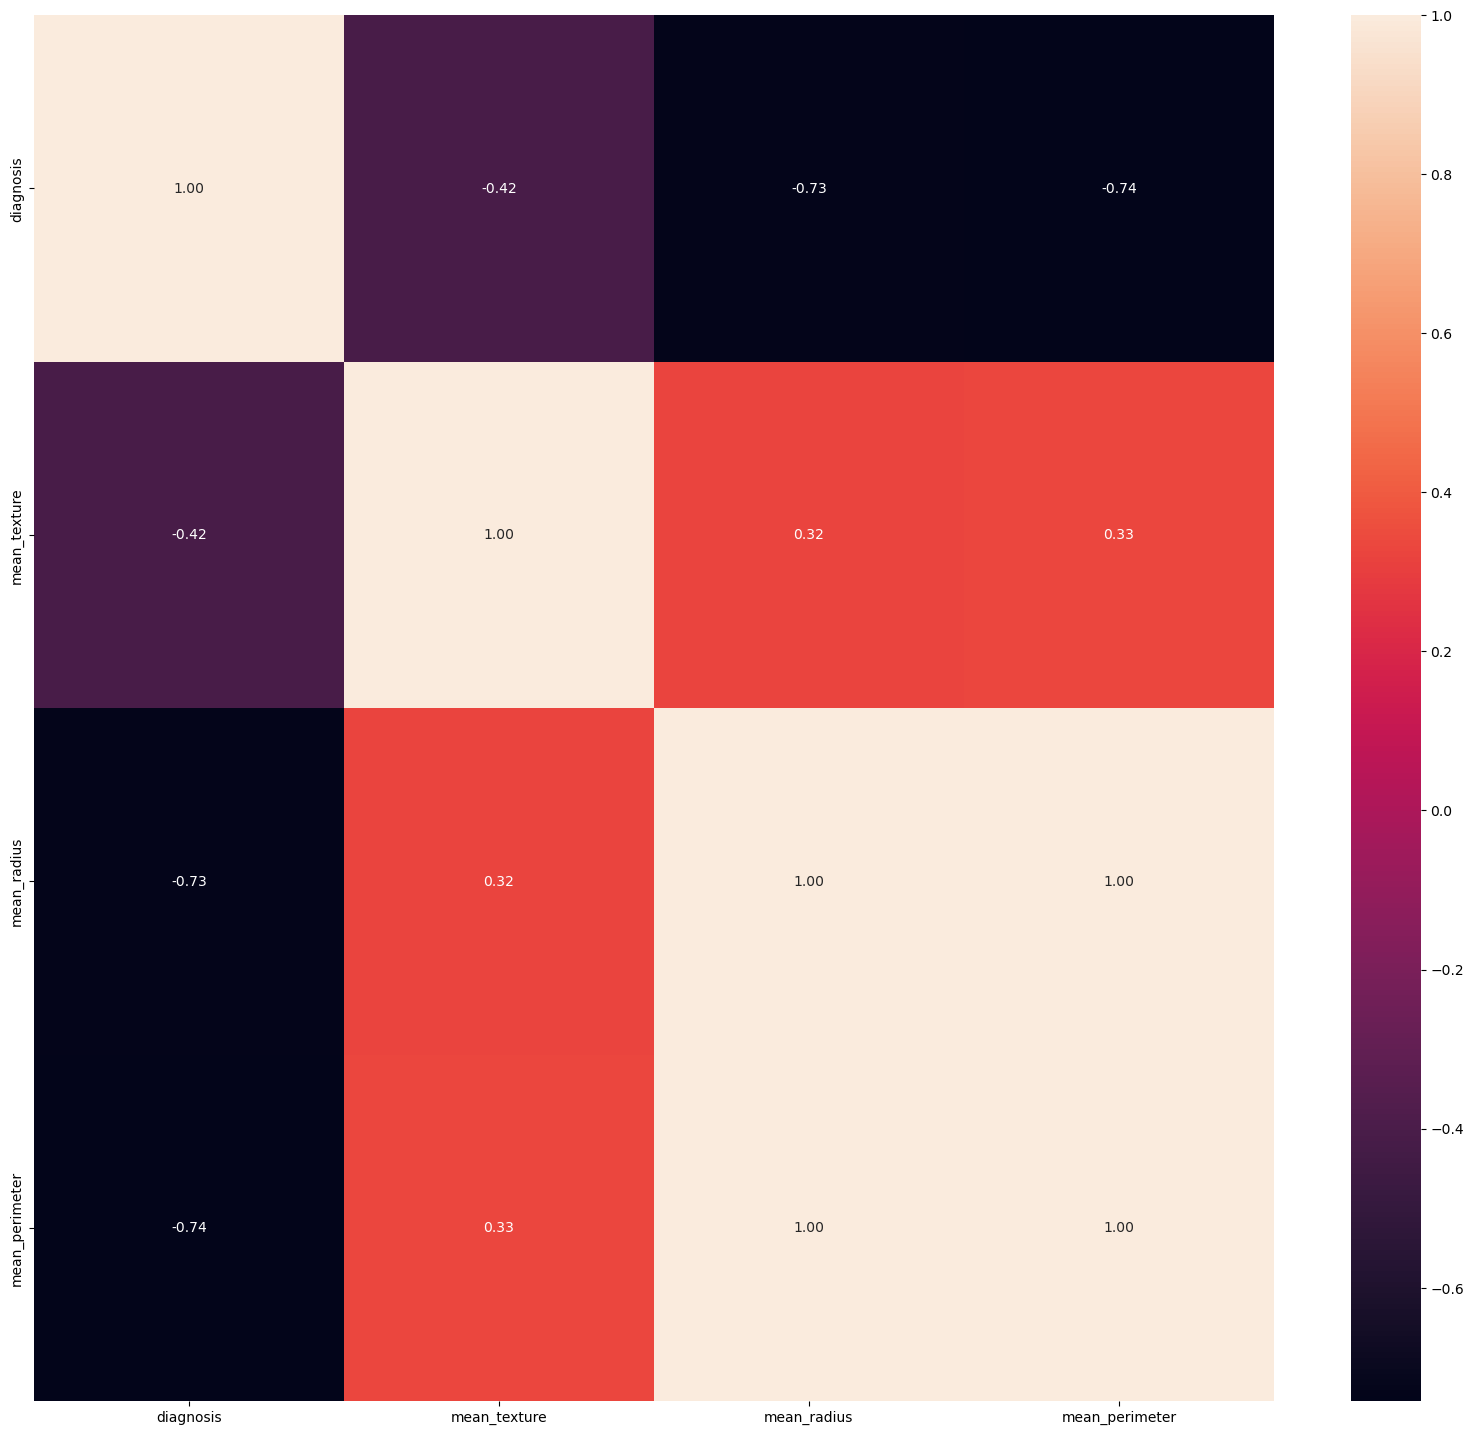

In [11]:
plt.figure(figsize=(20,18))
sns.heatmap(corr_mat, annot=True,fmt=".2f",)
plt.show()

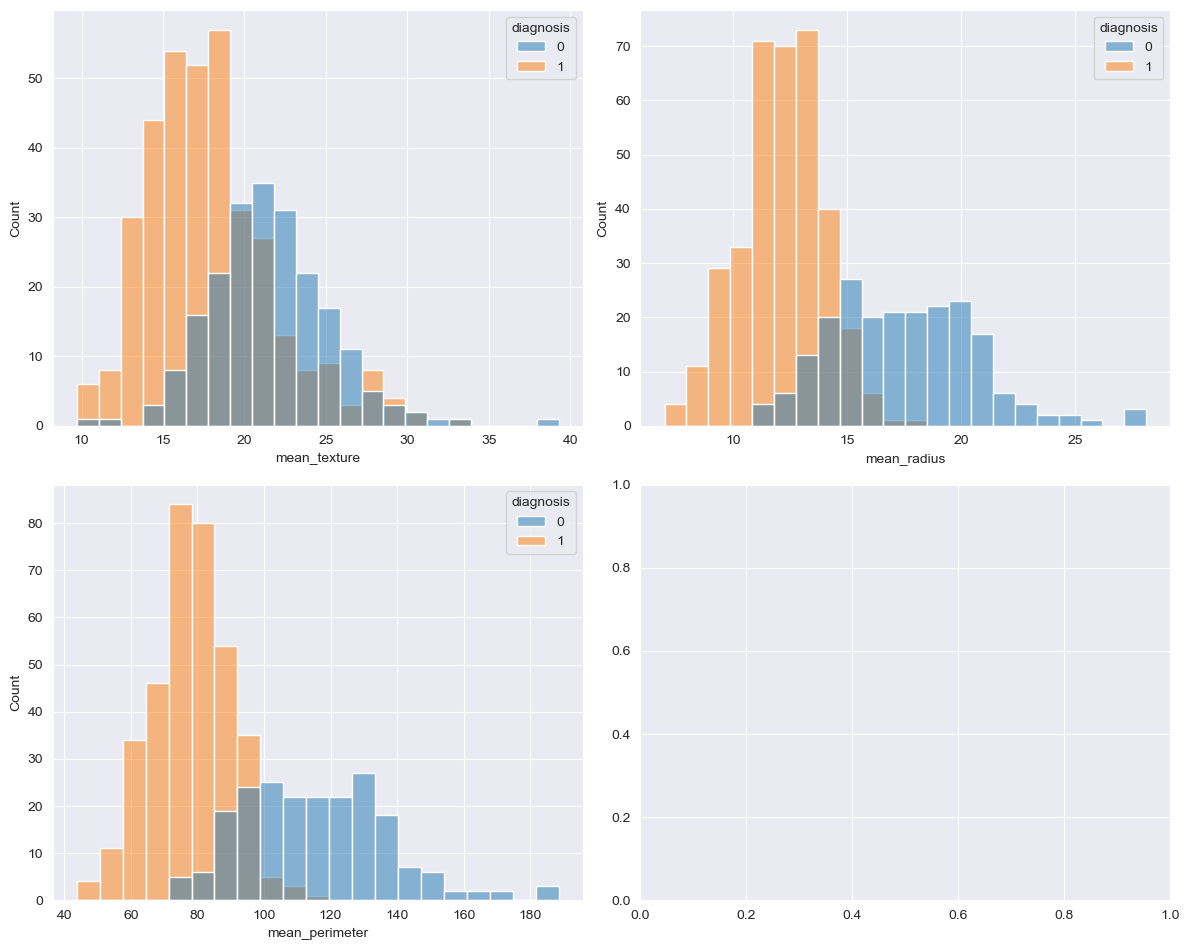

In [12]:
sns.set_style("darkgrid")

features_to_graph = ordered_index[1:9]

num_features = len(features_to_graph)
num_rows = (num_features + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4.8 * num_rows))
# [6.4, 4.8]
for i, feature in enumerate(features_to_graph):
    ax_row = i // 2
    ax_col = i % 2
    sns.histplot(x=feature, data=df, hue="diagnosis", ax=axes[ax_row, ax_col])

plt.tight_layout()
plt.show()

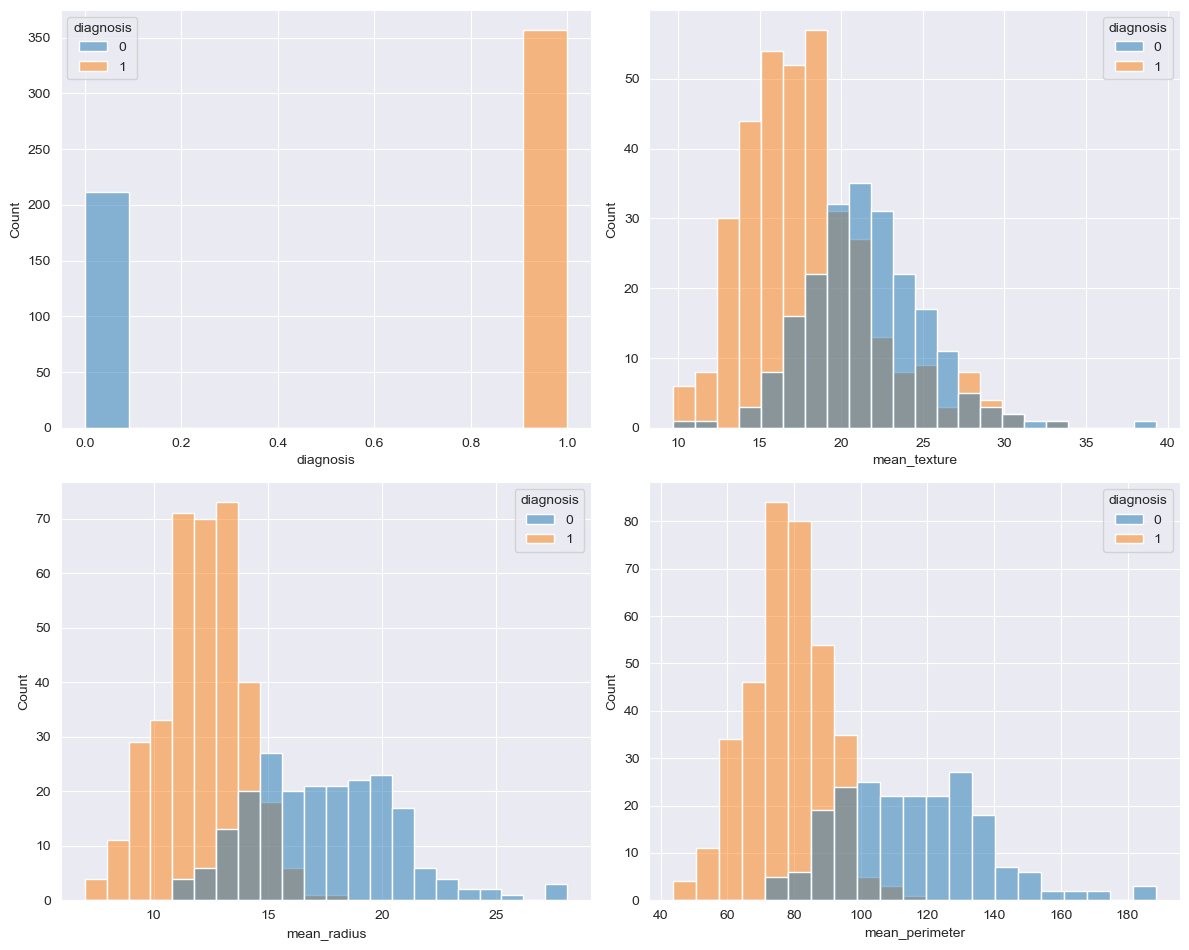

In [13]:
features_to_graph = ordered_index[-4:]

num_features = len(features_to_graph)
num_rows = (num_features + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4.8 * num_rows))
# [6.4, 4.8]

for i, feature in enumerate(features_to_graph):
    ax_row = i // 2
    ax_col = i % 2
    sns.histplot(x=feature, data=df, hue="diagnosis", ax=axes[ax_row, ax_col])

plt.tight_layout()
plt.show()